# Wrangle and Analyze Data Project

## Introduction


This project is part of Udacity Data Analyst Nanodegree

The purpose of this project is to wrangle data about WeRateDogs Twitter account. First, data is going to be obtained
from multiple sources. Next, the data is going to be assessed in terms of both quality and tidiness ( https://ryanwingate.com/purpose/tidy-data/ ). Finally, I will clean the data and perform simple analysis.

## Gathering Data

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import requests
import os

In [2]:
# load Twitter archive data and display 1 row
df_archive_original = pd.read_csv('twitter-archive-enhanced.csv')
df_archive_original.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [3]:
# Download the tweet image predictions
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
local_filename = url.split('/')[-1]
r = requests.get(url)
f = open(local_filename, 'wb')
f.write(r.content)

335079

In [4]:
# open and look at the predictions
df_pred_original = pd.read_csv('image-predictions.tsv', sep='\t')
df_pred_original.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
# Check for tweet_json.txt
# if tweet_json.txt doesn't exist, download programatically
url = 'https://s3.amazonaws.com/video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
json_txt_file_path = 'tweet_json.txt'
if not os.path.isfile(json_txt_file_path):
    with open(json_txt_file_path, mode = 'wb') as file:
        file.write(requests.get(url).content)
# Load into DataFrame
df_json_original = pd.read_json(json_txt_file_path, lines=True)
df_json_original = df_json_original[['id', 'retweet_count', 'favorite_count']]
df_json_original.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


Make copies of the dataframes for the analysis.

In [6]:
df_archive = df_archive_original.copy()
df_pred = df_pred_original.copy()
df_json = df_json_original.copy()

## Assessing Data

In [7]:
df_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [8]:
df_pred.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
df_json.head(1)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467


In [10]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [13]:
df_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
df_archive.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
Lucy             11
Tucker           10
Lola             10
Penny            10
Winston           9
Bo                9
the               8
Sadie             8
an                7
Daisy             7
Toby              7
Bailey            7
Buddy             7
Scout             6
Leo               6
Jax               6
Koda              6
Stanley           6
Milo              6
Dave              6
Bella             6
Oscar             6
Jack              6
Rusty             6
Sammy             5
               ... 
Meera             1
Kirk              1
Sailor            1
Zoe               1
Gabby             1
Millie            1
Cleopatricia      1
Kota              1
Mojo              1
Damon             1
Barclay           1
Hamrick           1
Stu               1
Chubbs            1
Ralphé            1
Frönq             1
Jeb               1
Arnold            1
Tycho             1


### Quality

1. Change the **id** column in `df_json` dataframe to **tweet_id** in order to match it with other dataframes. This will make is easier to merge dataframes at the last steps. In addition, I will change the data type from int to string because ids should not be numeric and they aren't intended to perform calculations.
2. Change **timestamp** data type in `df_archive`. This step will help if I was to analyze the data based on time or date.
3. Drop **retweets** rows in `df_archive`. As per project instructions, only original tweets must be included in the final master dataset.
4. Drop unnecessary columns in `df_archive`. It is not properly an issue, but it will make it easier to analyze the data. That is why I have 9 bullet points in this section.
5. Drop null values from **expanded_urls** in `df_archive`. The **expanded_urls** is the only column that has a few missing values. I could not determine why that was the case nor I could fill these values out; therefore, I will drop these values.
6. Drop tweets that are not dogs. This analysis should only incorporate tweets of dogs; therefore, the next step is to delete rows that contain non-dog tweets. In order to do that, I will merge the df_pred dataframe with df_archive and create a new dataframe df_archive2. The df_pred contains 3 predictions from the neural network whether a picture shows a dog. I assume that if any of the predictions suggest that it is a dog, I treated it as a dog. I checked a few tweets ‘by hand’ and it appeared to be true.
7. Clean **rating_denominator** in `df_archive`. Extract the values from text, delete tweets without ratings and tweets with multiple dogs. Change the data type to float.
8. Clean **rating_nominator** in `df_archive`. Extract the values from text, delete tweets without ratings and tweets with multiple dogs. Change the data type to float.
9. Clean names using regular expression in `df_archive`. A useful pattern to find these "fake names" is that they started with lowercase, instead, the "real names" always started with uppercase, moreover, the real ones usually are placed after words like "named", "is" etc...so it'is possible to clean this issue using a regex.


### Tidiness
1. Melt 'doggo' 'floofer' 'pupper' 'puppo' in `df_archive`.
2. Join all data frames into `twitter_archive_master.csv`.

## Cleaning Data
### Quality

**Define**
1. Change the **id** column in `df_json` dataframe to **tweet_id** in order to match it with other dataframes. This will make is easier to merge dataframes at the last steps. In addition, I will change the data type from int to string because ids should not be numeric and they aren't intended to perform calculations.

**Code**

In [15]:
# rename to `tweet_id`
df_json = df_json.rename(columns={'id': 'tweet_id'})

In [16]:
# change `tweet_id` datatype to string in all 3 data frames
df_archive['tweet_id']= df_archive['tweet_id'].astype(str)
df_pred['tweet_id']= df_pred['tweet_id'].astype(str)
df_json['tweet_id']= df_json['tweet_id'].astype(str)

**Test**

In [17]:
df_json.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


In [18]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


**Define**
2. Change **timestamp** data type in `df_archive`. This step will help if I was to analyze the data based on time or date.

**Code**

In [19]:
# change data type to datetime
df_archive['timestamp'] = pd.to_datetime(df_archive.timestamp)

**Test**

In [20]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

**Define**
3. Drop **retweets** rows in `df_archive`. As per project instructions, only original tweets must be included in the final master dataset.

**Code**

In [21]:
# check how many retweets are in the dataframe
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

There are 181 retweets in the dataframe. Next, I will delete the retweets.

In [22]:
# select retweets by checking the retweets columns (if they are empty it's an original tweet).
df_archive_notnull = df_archive[df_archive.retweeted_status_id.notnull()]
df_archive_notnull

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [23]:
# drop retweets (df_archive.retweeted_status rows that are not empty)
df_archive = df_archive.drop(df_archive_notnull.index, axis=0)
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


**Test**

In [24]:
# confirm changes (retweeted_status_id should be 0)
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), fl

**Define**
4. Drop unnecessary columns in `df_archive`. It is not properly an issue, but it will make it easier to analyze the data. That is why I have 9 bullet points in this section.

**Code**

In [25]:
# drop columns
df_archive.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'source'], axis=1, inplace = True)

**Test**

In [26]:
# confirm changes
df_archive

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


**Define**
5. Drop null values from **expanded_urls** in `df_archive`. The **expanded_urls** is the only column that has a few missing values. I could not determine why that was the case nor I could fill these values out; therefore, I will drop these values.

**Code**

In [27]:
# drop null values
df_archive.dropna(inplace=True)

**Test**

In [28]:
# confirm changes
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 198.5+ KB


**Define**
6. Drop tweets that are not dogs. This analysis should only incorporate tweets of dogs; therefore, the next step is to delete rows that contain non-dog tweets. In order to do that, I will merge the df_pred dataframe with df_archive and create a new dataframe df_archive2. The df_pred contains 3 predictions from the neural network whether a picture shows a dog. I assume that if any of the predictions suggest that it is a dog, I treated it as a dog. I checked a few tweets ‘by hand’ and it appeared to be true.

**Code**

In [29]:
# merge predictions into the archive
df_archive2 = df_archive.merge(df_pred, on=['tweet_id'], how='left')

In [30]:
# check if the dataframes were merged correctly
df_archive2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 22 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null float64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null object
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null object
p3                    1994 non-null object
p3_conf               19

In [31]:
# select pictures if any of the predictions suggest that it is a dog
df_archive2 = df_archive2.query('p1_dog == True | p2_dog == True | p3_dog == True')

**Test**

In [32]:
# check how many dog tweets are left
df_archive2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1686 entries, 1 to 2116
Data columns (total 22 columns):
tweet_id              1686 non-null object
timestamp             1686 non-null datetime64[ns]
text                  1686 non-null object
expanded_urls         1686 non-null object
rating_numerator      1686 non-null int64
rating_denominator    1686 non-null int64
name                  1686 non-null object
doggo                 1686 non-null object
floofer               1686 non-null object
pupper                1686 non-null object
puppo                 1686 non-null object
jpg_url               1686 non-null object
img_num               1686 non-null float64
p1                    1686 non-null object
p1_conf               1686 non-null float64
p1_dog                1686 non-null object
p2                    1686 non-null object
p2_conf               1686 non-null float64
p2_dog                1686 non-null object
p3                    1686 non-null object
p3_conf               16

**Define**
7. Clean **rating_denominator** in `df_archive`. Extract the values from text, delete tweets without ratings and tweets with multiple dogs. Change the data type to float.

8. Clean **rating_denominator** in `df_archive`. Extract the values from text, delete tweets without ratings and tweets with multiple dogs. Change the data type to float.

**Code**

In [33]:
# change column width to view full text
pd.options.display.max_colwidth = 200

In [34]:
# import regular expression
import re

In [35]:
# extract ratings from the text column into a new column 'ratings'.
# Some ratings need to be fixed manually because there are multiple xx/xx occurrences in text
# or there are multiple dogs in one picture
df_archive2['ratings'] = df_archive2['text'].str.extract(r'(\d+\.?\d*/\d+){1}', expand = False)

In [36]:
# Extract rating numerators from the new column 'ratings' as float
df_archive2['rating_numerator'] = df_archive2['ratings'].str.split('/').str.get(0).astype(float)

In [37]:
# Extract rating denominators from the new column 'ratings' as float
df_archive2['rating_denominator'] = df_archive2['ratings'].str.split('/').str.get(1).astype(float)

In [38]:
# drop ratings column after the extraction
df_archive2.drop(['ratings'], axis=1, inplace=True)

In this section, I'm going to manually clean incorrecntly extracted ratings. I will delete tweets with multiple dogs.

In [39]:
df_archive2['rating_denominator'].value_counts()

10.0     1669
50.0        3
80.0        2
11.0        2
130.0       1
150.0       1
2.0         1
120.0       1
110.0       1
40.0        1
90.0        1
20.0        1
7.0         1
70.0        1
Name: rating_denominator, dtype: int64

In [40]:
df_archive2[df_archive2.rating_denominator == 70]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
341,820690176645140481,2017-01-15 17:52:40,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84.0,70.0,None,None,None,None,...,2.0,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.0374,True


In [41]:
# drop row 341 because it is multiple dogs
df_archive2.drop(341, inplace=True)

In [42]:
df_archive2[df_archive2.rating_denominator == 7]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
405,810984652412424192,2016-12-19 23:06:23,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24.0,7.0,Sam,None,None,None,...,1.0,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True


In [43]:
# drop row 405 as there is no rating provided
df_archive2.drop(405, inplace=True)

In [44]:
df_archive2[df_archive2.rating_denominator == 20]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
953,722974582966214656,2016-04-21 02:25:47,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4.0,20.0,None,None,None,None,...,1.0,Great_Dane,0.246762,True,Greater_Swiss_Mountain_dog,0.126131,True,Weimaraner,0.085297,True


In [45]:
df_archive2.loc[953, 'rating_denominator'] = 10
df_archive2.loc[953, 'rating_numerator'] = 13

In [46]:
df_archive2[df_archive2.rating_denominator == 40]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1218,697463031882764288,2016-02-10 16:51:59,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,https://twitter.com/dog_rates/status/697463031882764288/photo/1,44.0,40.0,None,None,None,None,...,1.0,Labrador_retriever,0.999885,True,golden_retriever,0.000098,True,pug,0.000008,True


In [47]:
# drop row 1218 because it is multiple dogs
df_archive2.drop(1218, inplace=True)

In [48]:
df_archive2[df_archive2.rating_denominator == 90]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1016,713900603437621249,2016-03-27 01:29:02,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99.0,90.0,None,None,None,None,...,1.0,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True


In [49]:
# drop row 1016 because it is multiple dogs
df_archive2.drop(1016, inplace=True)

In [50]:
df_archive2[df_archive2.rating_denominator == 110]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1411,684222868335505415,2016-01-05 04:00:18,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,https://twitter.com/dog_rates/status/684222868335505415/photo/1,121.0,110.0,None,None,None,None,...,1.0,soft-coated_wheaten_terrier,0.791182,True,cocker_spaniel,0.072444,True,teddy,0.071486,False


In [51]:
# drop row 1411 because it is multiple dogs
df_archive2.drop(1411, inplace=True)

In [52]:
df_archive2[df_archive2.rating_denominator == 120]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1552,677716515794329600,2015-12-18 05:06:23,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,https://twitter.com/dog_rates/status/677716515794329600/photo/1,144.0,120.0,None,None,None,None,...,1.0,teddy,0.662908,False,crib,0.031891,False,chow,0.025438,True


In [53]:
# drop row 1552 because it is multiple dogs
df_archive2.drop(1552, inplace=True)

In [54]:
df_archive2[df_archive2.rating_denominator == 130]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1410,684225744407494656,2016-01-05 04:11:44,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3","https://twitter.com/dog_rates/status/684225744407494656/photo/1,https://twitter.com/dog_rates/status/684225744407494656/photo/1",143.0,130.0,None,None,None,None,...,2.0,golden_retriever,0.203249,True,Samoyed,0.067958,True,Great_Pyrenees,0.065327,True


In [55]:
# drop row 1410 because it is multiple dogs
df_archive2.drop(1410, inplace=True)

In [56]:
df_archive2[df_archive2.rating_denominator == 150]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
702,758467244762497024,2016-07-28 01:00:57,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150.0,None,None,None,None,...,1.0,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True


In [57]:
# drop row 1410 because it is multiple dogs
df_archive2.drop(702, inplace=True)

In [58]:
df_archive2[df_archive2.rating_denominator == 2]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2096,666287406224695296,2015-11-16 16:11:11,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1.0,2.0,an,None,None,None,...,1.0,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


In [59]:
# change row 2096
df_archive2.loc[2096, 'rating_denominator'] = 10
df_archive2.loc[2096, 'rating_numerator'] = 9

In [60]:
df_archive2[df_archive2.rating_denominator == 11]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
857,740373189193256964,2016-06-08 02:41:38,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,http...",9.0,11.0,None,None,None,None,...,3.0,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
1438,682962037429899265,2016-01-01 16:30:13,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7.0,11.0,Darrel,None,None,None,...,1.0,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False


In [61]:
df_archive2.loc[857, 'rating_denominator'] = 10
df_archive2.loc[857, 'rating_numerator'] = 14

In [62]:
df_archive2.loc[1438, 'rating_denominator'] = 10
df_archive2.loc[1438, 'rating_numerator'] = 10

In [63]:
df_archive2[df_archive2.rating_denominator == 80]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1041,710658690886586372,2016-03-18 02:46:49,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80.0,80.0,None,None,None,None,...,1.0,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True
1615,675853064436391936,2015-12-13 01:41:41,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,"https://twitter.com/dog_rates/status/675853064436391936/photo/1,https://twitter.com/dog_rates/status/675853064436391936/photo/1",88.0,80.0,None,None,None,None,...,1.0,Labrador_retriever,0.868367,True,golden_retriever,0.043305,True,vizsla,0.028207,True


In [64]:
# drop rows 1041 and 1615 because it is multiple dogs
df_archive2.drop([1041,1615], inplace=True)

In [65]:
df_archive2[df_archive2.rating_denominator == 50]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
990,716439118184652801,2016-04-03 01:36:11,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50.0,50.0,Bluebert,None,None,None,...,1.0,Siberian_husky,0.396495,True,malamute,0.317053,True,Eskimo_dog,0.273419,True
1061,709198395643068416,2016-03-14 02:04:08,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",https://twitter.com/dog_rates/status/709198395643068416/photo/1,45.0,50.0,None,None,None,None,...,1.0,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True
1136,704054845121142784,2016-02-28 21:25:30,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60.0,50.0,a,None,None,None,...,1.0,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True


In [66]:
df_archive2.loc[990, 'rating_denominator'] = 10
df_archive2.loc[990, 'rating_numerator'] = 11

In [67]:
# drop rows 1061 and 1136 because it is multiple dogs
df_archive2.drop([1061,1136], inplace=True)

**Clean Rating Numerator**

In [68]:
df_archive2.rating_numerator.value_counts()

12.00    423
10.00    361
11.00    357
13.00    230
9.00     133
8.00      68
7.00      31
14.00     24
6.00      16
5.00      13
4.00       6
3.00       5
2.00       2
13.50      1
11.27      1
0.00       1
11.26      1
9.75       1
Name: rating_numerator, dtype: int64

In [69]:
df_archive2[df_archive2.rating_numerator == 0]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
249,835152434251116546,2017-02-24 15:40:31,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0.0,10.0,None,None,None,None,...,3.0,swing,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True


In [70]:
df_archive2[df_archive2.rating_numerator == 2]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1538,678424312106393600,2015-12-20 03:58:55,This is Crystal. She's a shitty fireman. No sense of urgency. People could be dying Crystal. 2/10 just irresponsible https://t.co/rtMtjSl9pz,https://twitter.com/dog_rates/status/678424312106393600/photo/1,2.0,10.0,Crystal,None,None,None,...,1.0,Maltese_dog,0.759945,True,toy_poodle,0.101194,True,Shih-Tzu,0.056037,True
2010,667878741721415682,2015-11-21 01:34:35,This is Tedrick. He lives on the edge. Needs someone to hit the gas tho. Other than that he's a baller. 10&amp;2/10 https://t.co/LvP1TTYSCN,https://twitter.com/dog_rates/status/667878741721415682/photo/1,2.0,10.0,Tedrick,None,None,None,...,1.0,seat_belt,0.200373,False,miniature_pinscher,0.106003,True,schipperke,0.104733,True


In [71]:
df_archive2[df_archive2.rating_numerator == 3]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
589,777885040357281792,2016-09-19 15:00:20,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,"https://twitter.com/dog_rates/status/777885040357281792/photo/1,https://twitter.com/dog_rates/status/777885040357281792/photo/1",3.0,10.0,Wesley,None,None,None,...,1.0,Afghan_hound,0.123529,True,basset,0.119682,True,Siberian_husky,0.108709,True
977,718246886998687744,2016-04-08 01:19:36,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,https://twitter.com/dog_rates/status/718246886998687744/photo/1,3.0,10.0,Alexanderson,None,None,None,...,1.0,Chihuahua,0.354488,True,carton,0.159672,False,Siberian_husky,0.057498,True
1036,711306686208872448,2016-03-19 21:41:44,What hooligan sent in pictures w/out a dog in them? Churlish af. 3/10 just bc that's a neat fluffy bean bag chair https://t.co/wcwoGOkZvz,"https://twitter.com/dog_rates/status/711306686208872448/photo/1,https://twitter.com/dog_rates/status/711306686208872448/photo/1",3.0,10.0,None,None,None,None,...,1.0,leatherback_turtle,0.280835,False,loggerhead,0.123290,False,Dandie_Dinmont,0.086792,True
1706,673906403526995968,2015-12-07 16:46:21,Guys I'm getting real tired of this. We only rate dogs. Please don't send in other things like this Bulbasaur. 3/10 https://t.co/t5rQHl6W8M,https://twitter.com/dog_rates/status/673906403526995968/photo/1,3.0,10.0,None,None,None,None,...,1.0,toilet_seat,0.683319,False,soft-coated_wheaten_terrier,0.048928,True,Siberian_husky,0.030386,True
1948,668989615043424256,2015-11-24 03:08:48,This is Bernie. He's taking his Halloween costume very seriously. Wants to be baked. 3/10 not a good idea Bernie smh https://t.co/1zBp1moFlX,https://twitter.com/dog_rates/status/668989615043424256/photo/1,3.0,10.0,Bernie,None,None,None,...,1.0,pug,0.917326,True,waffle_iron,0.014918,False,Chihuahua,0.013524,True


In [72]:
df_archive2[df_archive2.rating_numerator == 4]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
797,747816857231626240,2016-06-28 15:40:07,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,https://twitter.com/dog_rates/status/747816857231626240/photo/1,4.0,10.0,a,None,None,None,...,1.0,Pembroke,0.768923,True,Chihuahua,0.029053,True,Shetland_sheepdog,0.029035,True
1089,707420581654872064,2016-03-09 04:19:44,This is Keurig. He's a rare dog. Laughs like an idiot tho. Head is basically a weapon. Poorly maintained goatee 4/10 https://t.co/xOrUyj7K30,https://twitter.com/dog_rates/status/707420581654872064/photo/1,4.0,10.0,Keurig,None,None,None,...,1.0,ram,0.518215,False,kuvasz,0.149391,True,Great_Pyrenees,0.106003,True
1475,680940246314430465,2015-12-27 02:36:20,This is Alice. She's an idiot. 4/10 https://t.co/VQXdwJfkyS,https://twitter.com/dog_rates/status/680940246314430465/photo/1,4.0,10.0,Alice,None,None,None,...,1.0,soft-coated_wheaten_terrier,0.289598,True,West_Highland_white_terrier,0.157195,True,toy_poodle,0.074435,True
1836,671122204919246848,2015-11-30 00:22:57,Two miniature golden retrievers here. Webbed paws. Don't walk very efficiently. Can't catch a tennis ball. 4/10s https://t.co/WzVLdSHJU7,https://twitter.com/dog_rates/status/671122204919246848/photo/1,4.0,10.0,None,None,None,None,...,1.0,goose,0.351957,False,Chihuahua,0.101228,True,hen,0.065818,False
2050,667176164155375616,2015-11-19 03:02:47,These are strange dogs. All have toupees. Long neck for dogs. In a shed of sorts? Work in groups? 4/10 still petable https://t.co/PZxSarAfSN,https://twitter.com/dog_rates/status/667176164155375616/photo/1,4.0,10.0,None,None,None,None,...,1.0,soft-coated_wheaten_terrier,0.318981,True,Lakeland_terrier,0.215218,True,toy_poodle,0.106014,True
2077,666649482315059201,2015-11-17 16:09:56,Cool dog. Enjoys couch. Low monotone bark. Very nice kicks. Pisses milk (must be rare). Can't go down stairs. 4/10 https://t.co/vXMKrJC81s,https://twitter.com/dog_rates/status/666649482315059201/photo/1,4.0,10.0,None,None,None,None,...,1.0,Border_collie,0.447803,True,English_springer,0.170497,True,collie,0.139206,True


In [73]:
df_archive2[df_archive2.rating_numerator == 5]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
561,781661882474196992,2016-09-30 01:08:10,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,https://twitter.com/dog_rates/status/781661882474196992/photo/1,5.0,10.0,None,None,None,None,...,1.0,Pembroke,0.438087,True,golden_retriever,0.226954,True,collie,0.070652,True
750,751583847268179968,2016-07-09 01:08:47,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5.0,10.0,None,doggo,None,pupper,...,1.0,dalmatian,0.868304,True,studio_couch,0.059623,False,snow_leopard,0.013876,False
1288,691483041324204033,2016-01-25 04:49:38,When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 10/10 for heartbroken pup https://t.co/aenk0KpoWM,"https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1,https://twitter.com/dog_rates/status/691483041324204033/photo/1,http...",5.0,10.0,None,None,None,None,...,1.0,bloodhound,0.886232,True,black-and-tan_coonhound,0.077420,True,Gordon_setter,0.009826,True
1421,683849932751646720,2016-01-04 03:18:23,This is Jiminy. He's not the brightest dog. Needs to lay off the kibble. 5/10 still petable https://t.co/omln4LOy1x,https://twitter.com/dog_rates/status/683849932751646720/photo/1,5.0,10.0,Jiminy,None,None,None,...,1.0,hog,0.458855,False,Mexican_hairless,0.164906,True,wild_boar,0.111700,False
1569,677301033169788928,2015-12-17 01:35:24,This is Juckson. He's totally on his way to a nascar race. 5/10 for Juckson https://t.co/IoLRvF0Kak,https://twitter.com/dog_rates/status/677301033169788928/photo/1,5.0,10.0,Juckson,None,None,None,...,1.0,Japanese_spaniel,0.661178,True,Pekinese,0.150119,True,Chihuahua,0.119720,True
1592,676588346097852417,2015-12-15 02:23:26,This is Bubbles. He kinda resembles a fish. Always makes eye contact with u no matter what. Sneaky tongue slip. 5/10 https://t.co/Nrhvc5tLFT,https://twitter.com/dog_rates/status/676588346097852417/photo/1,5.0,10.0,Bubbles,None,None,None,...,1.0,Boston_bull,0.976577,True,French_bulldog,0.014324,True,Chihuahua,0.002302,True
1671,674646392044941312,2015-12-09 17:46:48,Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https://t.co/YPfw7oahbD,https://twitter.com/dog_rates/status/674646392044941312/photo/1,5.0,10.0,None,None,None,None,...,1.0,flat-coated_retriever,0.837448,True,groenendael,0.086166,True,Labrador_retriever,0.016052,True
1746,672980819271634944,2015-12-05 03:28:25,Extraordinary dog here. Looks large. Just a head. No body. Rather intrusive. 5/10 would still pet https://t.co/ufHWUFA9Pu,https://twitter.com/dog_rates/status/672980819271634944/photo/1,5.0,10.0,None,None,None,None,...,1.0,car_mirror,0.232754,False,basset,0.219461,True,beagle,0.112397,True
1858,670782429121134593,2015-11-29 01:52:48,This dude slaps your girl's ass what do you do?\n5/10 https://t.co/6dioUL6gcP,https://twitter.com/dog_rates/status/670782429121134593/photo/1,5.0,10.0,None,None,None,None,...,1.0,Chihuahua,0.952963,True,French_bulldog,0.036575,True,Boston_bull,0.001977,True
1946,668994913074286592,2015-11-24 03:29:51,Two gorgeous pups here. Both have cute fake horns(adorable). Barn in the back looks on fire. 5/10 would pet rly well https://t.co/w5oYFXi0uh,https://twitter.com/dog_rates/status/668994913074286592/photo/1,5.0,10.0,None,None,None,None,...,1.0,hog,0.113789,False,English_springer,0.089763,True,French_bulldog,0.082186,True


In [74]:
df_archive2[df_archive2.rating_numerator == 6]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
186,848212111729840128,2017-04-01 16:35:01,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",https://twitter.com/dog_rates/status/848212111729840128/photo/1,6.0,10.0,Jerry,None,None,None,...,1.0,Bedlington_terrier,0.333486,True,Ibizan_hound,0.245797,True,wallaby,0.131647,False
786,748575535303884801,2016-06-30 17:54:50,This is one of the most reckless puppers I've ever seen. How she got a license in the first place is beyond me. 6/10 https://t.co/z5bAdtn9kd,https://twitter.com/dog_rates/status/748575535303884801/photo/1,6.0,10.0,one,None,None,None,...,1.0,muzzle,0.176172,False,seat_belt,0.160953,False,soft-coated_wheaten_terrier,0.086499,True
867,739485634323156992,2016-06-05 15:54:48,This is Kyle. He's a heavy drinker and an avid pot user. Just wants to be pupular. 6/10 I can't support this Kyle https://t.co/rRULp7XFnO,"https://twitter.com/dog_rates/status/739485634323156992/photo/1,https://twitter.com/dog_rates/status/739485634323156992/photo/1",6.0,10.0,Kyle,None,None,None,...,2.0,Walker_hound,0.640256,True,English_foxhound,0.229799,True,beagle,0.037754,True
1173,700462010979500032,2016-02-18 23:28:52,This is Murphy. He's a mini golden retriever. Missing two legs (tragic). Mouth sharp. Looks rather perturbed. 6/10 https://t.co/ALO02IAKCn,https://twitter.com/dog_rates/status/700462010979500032/photo/1,6.0,10.0,Murphy,None,None,None,...,1.0,hamster,0.678651,False,Pomeranian,0.110268,True,Angora,0.104139,False
1243,695051054296211456,2016-02-04 01:07:39,"Meet Brian (pronounced ""Kirk""). He's not amused by ur churlish tomfoolery. Once u put him down you're done for. 6/10 https://t.co/vityMwPKKi","https://twitter.com/dog_rates/status/695051054296211456/photo/1,https://twitter.com/dog_rates/status/695051054296211456/photo/1",6.0,10.0,Brian,None,None,None,...,1.0,Boston_bull,0.761454,True,pug,0.075395,True,Chihuahua,0.041598,True
1533,678740035362037760,2015-12-21 00:53:29,Meet Tango. He's a large dog. Doesn't care much for personal space. Owner isn't very accepting. Tongue slip. 6/10 https://t.co/p2T5kGebxe,https://twitter.com/dog_rates/status/678740035362037760/photo/1,6.0,10.0,Tango,None,None,None,...,1.0,seat_belt,0.787164,False,sunglasses,0.045739,False,beagle,0.022525,True
1560,677565715327688705,2015-12-17 19:07:09,Contortionist pup here. Inside pentagram. Clearly worships Satan. Known to slowly push fragile stuff off tables 6/10 https://t.co/EX9oR55VMe,https://twitter.com/dog_rates/status/677565715327688705/photo/1,6.0,10.0,None,None,None,None,...,1.0,basset,0.397295,True,Welsh_springer_spaniel,0.199554,True,purse,0.105641,False
1611,675891555769696257,2015-12-13 04:14:39,This is Donny. He's summoning the demon monster Babadook. 6/10 Donny please no that won't be a good time for anyone https://t.co/kiW6Knb7Gp,https://twitter.com/dog_rates/status/675891555769696257/photo/1,6.0,10.0,Donny,None,None,None,...,1.0,Italian_greyhound,0.305637,True,whippet,0.232057,True,Great_Dane,0.117806,True
1739,673240798075449344,2015-12-05 20:41:29,Magical floating dog here. Very calm. Always hangs by the pond. Rather moist. Good listener. 6/10 personally I'd pet https://t.co/1euKoOvy49,https://twitter.com/dog_rates/status/673240798075449344/photo/1,6.0,10.0,None,None,None,None,...,1.0,Airedale,0.443004,True,brown_bear,0.114162,False,Chesapeake_Bay_retriever,0.094639,True
1837,671115716440031232,2015-11-29 23:57:10,"Meet Phred. He isn't steering, looking at the road, or wearing a seatbelt. Phred is a rolling tornado of danger 6/10 https://t.co/mZD7Bo7HfV",https://twitter.com/dog_rates/status/671115716440031232/photo/1,6.0,10.0,Phred,None,None,None,...,1.0,malinois,0.406341,True,kelpie,0.143366,True,dingo,0.129802,False


In [75]:
df_archive2[df_archive2.rating_numerator == 7]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
696,759099523532779520,2016-07-29 18:53:24,Meet Toby. He has a drinking problem. Inflatable marijuana plant in the back is also not a good look. 7/10 cmon Toby https://t.co/Cim4DSj6Oi,https://twitter.com/dog_rates/status/759099523532779520/photo/1,7.0,10.0,Toby,None,None,None,...,1.0,Shetland_sheepdog,0.129034,True,kelpie,0.117508,True,Siberian_husky,0.106708,True
819,745712589599014916,2016-06-22 20:18:30,This is Percy. He fell asleep at the wheel. Irresponsible af. 7/10 absolute menace on the roadway https://t.co/QHbvtvaw8E,https://twitter.com/dog_rates/status/745712589599014916/photo/1,7.0,10.0,Percy,None,None,None,...,1.0,seat_belt,0.379055,False,chow,0.062754,True,minibus,0.052423,False
1111,706166467411222528,2016-03-05 17:16:20,This is Dexter. He's a shy pup. Doesn't bark much. Dreadful fetcher. Has rare sun allergy. 7/10 still petable https://t.co/sA7P3JSqiv,https://twitter.com/dog_rates/status/706166467411222528/photo/1,7.0,10.0,Dexter,None,None,None,...,1.0,Samoyed,0.430418,True,kuvasz,0.279600,True,Great_Pyrenees,0.117480,True
1200,698703483621523456,2016-02-14 03:01:06,This is Rusty. He has no respect for POULTRY products. Unbelievable af. 7/10 would still pet https://t.co/hEH19t1eFp,https://twitter.com/dog_rates/status/698703483621523456/photo/1,7.0,10.0,Rusty,None,None,None,...,1.0,Brittany_spaniel,0.931963,True,Welsh_springer_spaniel,0.030695,True,beagle,0.012896,True
1231,696405997980676096,2016-02-07 18:51:43,This is Berb. He just found out that they have made 31 Kidz Bop CD's. Downright terrifying. 7/10 hang in there Berb https://t.co/CIFLjiTFwZ,https://twitter.com/dog_rates/status/696405997980676096/photo/1,7.0,10.0,Berb,None,None,None,...,1.0,borzoi,0.132845,True,Walker_hound,0.086005,True,Great_Pyrenees,0.065582,True
1352,687494652870668288,2016-01-14 04:41:12,This is Marq. He stole this car. 7/10 wtf Marq? https://t.co/MHScqo5l8c,https://twitter.com/dog_rates/status/687494652870668288/photo/1,7.0,10.0,Marq,None,None,None,...,1.0,Rottweiler,0.391471,True,miniature_pinscher,0.273595,True,Tibetan_mastiff,0.041692,True
1358,687312378585812992,2016-01-13 16:36:55,"""You got any games on your phone"" 7/10 for invasive brown Dalmatian pupper https://t.co/yzGR9xjE9Q",https://twitter.com/dog_rates/status/687312378585812992/photo/1,7.0,10.0,None,None,None,pupper,...,1.0,seat_belt,0.703561,False,Great_Dane,0.139909,True,Weimaraner,0.021112,True
1385,685641971164143616,2016-01-09 01:59:19,This is Otis. He just passed a cop while going 61 in a 45. Very nervous pupper. 7/10 https://t.co/jJS8qQeuNO,https://twitter.com/dog_rates/status/685641971164143616/photo/1,7.0,10.0,Otis,None,None,pupper,...,1.0,Lakeland_terrier,0.253839,True,Airedale,0.213349,True,three-toed_sloth,0.083834,False
1504,679854723806179328,2015-12-24 02:42:51,This is Bruce. He's a rare pup. Covered in Frosted Flakes. Nifty gold teeth. Overall good dog. 7/10 would pet firmly https://t.co/RtxxACzZ8A,https://twitter.com/dog_rates/status/679854723806179328/photo/1,7.0,10.0,Bruce,None,None,None,...,1.0,llama,0.887963,False,ram,0.095021,False,chow,0.002307,True
1511,679530280114372609,2015-12-23 05:13:38,Guys this really needs to stop. We've been over this way too many times. This is a giraffe. We only rate dogs.. 7/10 https://t.co/yavgkHYPOC,https://twitter.com/dog_rates/status/679530280114372609/photo/1,7.0,10.0,a,None,None,None,...,1.0,dalmatian,0.750256,True,jaguar,0.169007,False,zebra,0.006481,False


In [76]:
df_archive2[df_archive2.rating_numerator == 13.5]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
41,883482846933004288,2017-07-08 00:28:19,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.5,10.0,Bella,None,None,None,...,1.0,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True


**Test**

In [77]:
# confirm that all denominators are 10
df_archive2['rating_denominator'].value_counts()

10.0    1674
Name: rating_denominator, dtype: int64

In [78]:
# check for changed data type (float for ratings)
df_archive2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1674 entries, 1 to 2116
Data columns (total 22 columns):
tweet_id              1674 non-null object
timestamp             1674 non-null datetime64[ns]
text                  1674 non-null object
expanded_urls         1674 non-null object
rating_numerator      1674 non-null float64
rating_denominator    1674 non-null float64
name                  1674 non-null object
doggo                 1674 non-null object
floofer               1674 non-null object
pupper                1674 non-null object
puppo                 1674 non-null object
jpg_url               1674 non-null object
img_num               1674 non-null float64
p1                    1674 non-null object
p1_conf               1674 non-null float64
p1_dog                1674 non-null object
p2                    1674 non-null object
p2_conf               1674 non-null float64
p2_dog                1674 non-null object
p3                    1674 non-null object
p3_conf             

In [79]:
# confirm changes
df_archive2.rating_numerator.value_counts()

12.00    423
10.00    361
11.00    357
13.00    230
9.00     133
8.00      68
7.00      31
14.00     24
6.00      16
5.00      13
4.00       6
3.00       5
2.00       2
13.50      1
11.27      1
0.00       1
11.26      1
9.75       1
Name: rating_numerator, dtype: int64

All rating numerators look clean.

**Define**
8. Clean names using regular expression in `df_archive`. A useful pattern to find these "fake names" is that they started with lowercase, instead, the "real names" always started with uppercase, moreover, the real ones usually are placed after words like "named", "is" etc...so it'is possible to clean this issue using a regex

**Code**

In [80]:
# extract correct names from text
df_archive2['name'] = df_archive2['text'].str.extract(r'([is|named|to|meet]+\s[A-Z][\W]?[A-Z]?[a-z]+)', expand = False).str.split(' ').str.get(1)

In [81]:
# Change 'I' to NaN
df_archive2.loc[df_archive2['name'] == "I", 'name'] = np.nan

**Test**

In [82]:
df_archive2['name'].value_counts()

Cooper        10
Charlie       10
Lucy          10
Tucker         9
Oliver         9
Penny          8
Daisy          7
Sadie          7
Winston        7
Toby           7
Lola           6
Koda           6
Jax            6
Bo             6
Bella          5
Oscar          5
Zoey           5
Rusty          5
Stanley        5
Reggie         5
Leo            5
Louis          4
Jack           4
Gus            4
Maggie         4
Oakley         4
Sophie         4
Milo           4
Finn           4
Boomer         4
              ..
Gingivitis     1
Kona           1
Rand           1
Yoshi          1
Pumpkin        1
Rueben         1
Jim            1
Bobble         1
Napolean       1
Lili           1
Murphy         1
Diogi          1
Franq          1
Kuyu           1
Stephanus      1
Molly          1
Winifred       1
Timison        1
Mollie         1
Bobbay         1
Blanket        1
Pawnd          1
Lilli          1
Bradley        1
Crimson        1
Kevon          1
Orion          1
Kayla         

In [83]:
df_archive2.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10.0,NaN,None,None,None,...,1.0,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


In [84]:
df_archive2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1674 entries, 1 to 2116
Data columns (total 22 columns):
tweet_id              1674 non-null object
timestamp             1674 non-null datetime64[ns]
text                  1674 non-null object
expanded_urls         1674 non-null object
rating_numerator      1674 non-null float64
rating_denominator    1674 non-null float64
name                  1321 non-null object
doggo                 1674 non-null object
floofer               1674 non-null object
pupper                1674 non-null object
puppo                 1674 non-null object
jpg_url               1674 non-null object
img_num               1674 non-null float64
p1                    1674 non-null object
p1_conf               1674 non-null float64
p1_dog                1674 non-null object
p2                    1674 non-null object
p2_conf               1674 non-null float64
p2_dog                1674 non-null object
p3                    1674 non-null object
p3_conf             

### Tidiness
1. Melt 'doggo' 'floofer' 'pupper' 'puppo' in `df_archive`.

In [85]:
df_archive2.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [86]:
df_archive2['stage'] = df_archive2.doggo + df_archive2.floofer + df_archive2.pupper + df_archive2.puppo
df_archive2.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NoneNoneNoneNone


In [87]:
df_archive2.stage.value_counts()

NoneNoneNoneNone        1414
NoneNonepupperNone       168
doggoNoneNoneNone         54
NoneNoneNonepuppo         21
doggoNonepupperNone        8
NoneflooferNoneNone        7
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: stage, dtype: int64

In [88]:
df_archive2.loc[df_archive2.stage == 'NoneNoneNoneNone', 'stage'] = 'None'
df_archive2.loc[df_archive2.stage == 'NoneNonepupperNone', 'stage'] = 'pupper'
df_archive2.loc[df_archive2.stage == 'doggoNoneNoneNone', 'stage'] = 'doggo'
df_archive2.loc[df_archive2.stage == 'NoneNoneNonepuppo', 'stage'] = 'puppo'
df_archive2.loc[df_archive2.stage == 'doggoNonepupperNone', 'stage'] = 'multiple'
df_archive2.loc[df_archive2.stage == 'NoneflooferNoneNone', 'stage'] = 'floofer'
df_archive2.loc[df_archive2.stage == 'doggoflooferNoneNone', 'stage'] = 'multiple'
df_archive2.loc[df_archive2.stage == 'doggoNoneNonepuppo', 'stage'] = 'multiple'

In [89]:
df_archive2.stage.value_counts()

None        1414
pupper       168
doggo         54
puppo         21
multiple      10
floofer        7
Name: stage, dtype: int64

In [90]:
# drop individual stages columns
df_archive2.drop(['floofer','doggo','pupper', 'puppo'], axis=1, inplace = True)
df_archive2.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,None


In [91]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


2. Join all data frames into `twitter_archive_master.csv`.

In [92]:
twitter_archive_master = df_archive2.merge(df_json, on=['tweet_id'], how='left')

In [93]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1674 entries, 0 to 1673
Data columns (total 21 columns):
tweet_id              1674 non-null object
timestamp             1674 non-null datetime64[ns]
text                  1674 non-null object
expanded_urls         1674 non-null object
rating_numerator      1674 non-null float64
rating_denominator    1674 non-null float64
name                  1321 non-null object
jpg_url               1674 non-null object
img_num               1674 non-null float64
p1                    1674 non-null object
p1_conf               1674 non-null float64
p1_dog                1674 non-null object
p2                    1674 non-null object
p2_conf               1674 non-null float64
p2_dog                1674 non-null object
p3                    1674 non-null object
p3_conf               1674 non-null float64
p3_dog                1674 non-null object
stage                 1674 non-null object
retweet_count         1674 non-null int64
favorite_count      

In [94]:
twitter_archive_master.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,...,True,Pekinese,0.090647,True,papillon,0.068957,True,None,6514,33819


In [95]:
# save to csv
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analysis

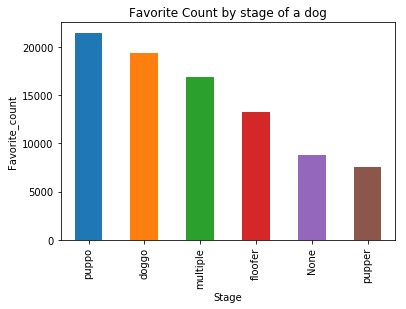

In [96]:
ax = twitter_archive_master.groupby('stage').favorite_count.mean().sort_values(ascending=False).plot(kind='bar', title='Favorite Count by stage of a dog');
ax.set_xlabel("Stage");
ax.set_ylabel("Favorite_count");

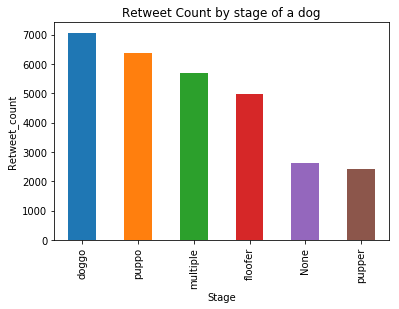

In [97]:
ax = twitter_archive_master.groupby('stage').retweet_count.mean().sort_values(ascending=False).plot(kind='bar', title='Retweet Count by stage of a dog');
ax.set_xlabel("Stage");
ax.set_ylabel("Retweet_count");

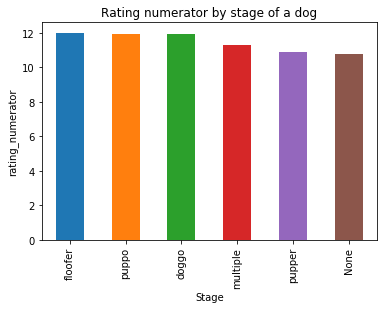

In [98]:
ax = twitter_archive_master.groupby('stage').rating_numerator.mean().sort_values(ascending=False).plot(kind='bar', title='Rating numerator by stage of a dog');
ax.set_xlabel("Stage");
ax.set_ylabel("rating_numerator");

The chart shows that tweets that contain dogs' stages like 'puppo' or 'doggo' tend to have higher count favorite count. On the other hand, 'puppers' have the lowest favorite count, even lower then 'None'. The same patter is present in the 'retweet_count'. In addition, dogs that have 'stage' added to the tweets, tend to have higher rating numerators. 'Floofers' tend to have the greatest rating numerators.

In [99]:
twitter_archive_master.rating_numerator.mean()

10.840370370370369

Mean rating_numerator for the tweets is 10.84.

In [100]:
twitter_archive_master[twitter_archive_master.stage == 'floofer'].rating_numerator.mean()

12.0

Mean rating_numerator for floofers is 12.

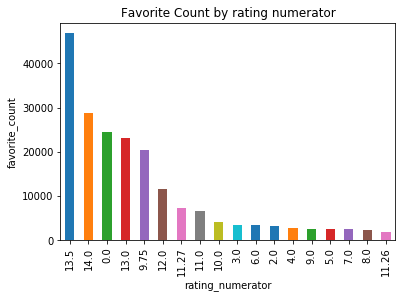

In [101]:
ax = twitter_archive_master.groupby('rating_numerator').favorite_count.mean().sort_values(ascending=False).plot(kind='bar', title='Favorite Count by rating numerator');
ax.set_xlabel("rating_numerator");
ax.set_ylabel("favorite_count");

In [102]:
twitter_archive_master.rating_numerator.value_counts()

12.00    423
10.00    361
11.00    357
13.00    230
9.00     133
8.00      68
7.00      31
14.00     24
6.00      16
5.00      13
4.00       6
3.00       5
2.00       2
13.50      1
11.27      1
0.00       1
11.26      1
9.75       1
Name: rating_numerator, dtype: int64

The chart shows that dogs with higher ratings also tend to get higher favorite count. An exception is rating numerator of 0; however, only one dog deceived that rating; therefore, we can ignore that results as the sample size is not big enough.

In [103]:
twitter_archive_master.favorite_count.mean()

9268.3655913978491

In [104]:
twitter_archive_master.groupby('rating_numerator').favorite_count.mean().sort_values(ascending=False)

rating_numerator
13.50    46860.000000
14.00    28772.416667
0.00     24574.000000
13.00    23103.182609
9.75     20296.000000
12.00    11473.617021
11.27     7320.000000
11.00     6661.815126
10.00     4124.229917
3.00      3384.200000
6.00      3382.312500
2.00      3162.500000
4.00      2780.166667
9.00      2524.849624
5.00      2518.923077
7.00      2422.290323
8.00      2233.882353
11.26     1879.000000
Name: favorite_count, dtype: float64

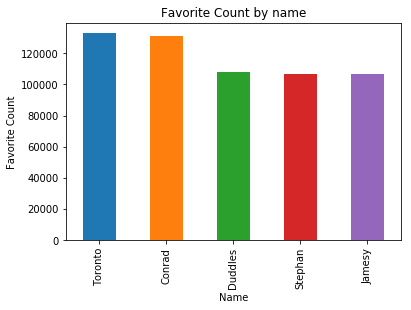

In [105]:
ax = twitter_archive_master.groupby('name').favorite_count.mean().sort_values(ascending=False).head().plot(kind='bar', title='Favorite Count by name');
ax.set_xlabel("Name");
ax.set_ylabel("Favorite Count");

In [106]:
twitter_archive_master.groupby('name').favorite_count.mean().sort_values(ascending=False).head()

name
Toronto    132810.0
Conrad     131075.0
Duddles    107956.0
Stephan    107015.0
Jamesy     106827.0
Name: favorite_count, dtype: float64

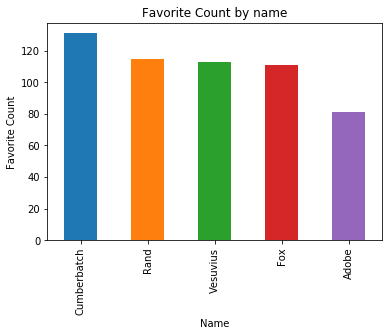

In [107]:
ax = twitter_archive_master.groupby('name').favorite_count.mean().sort_values(ascending=False).tail().plot(kind='bar', title='Favorite Count by name');
ax.set_xlabel("Name");
ax.set_ylabel("Favorite Count");

In [108]:
twitter_archive_master.groupby('name').favorite_count.mean().sort_values(ascending=False).tail()

name
Cumberbatch    131.0
Rand           115.0
Vesuvius       113.0
Fox            111.0
Adobe           81.0
Name: favorite_count, dtype: float64